# Word Embeddings

We will be looking at vector representation of words and word embeddings generally in this notebook. Most of the examples are adapted from [Allison Parrish's notebook here](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469) which has lots of great stuff.

First we will be playing with the data collected in a color survey conducted by the people (person?) behind [XKCD](https://xkcd.com/). From what I understand they asked many people to name colors as presented to them on screen - many people and many colors. So this led to a lot of data about what people think of when they say a given color. Also lots of interesting data about what different genders see (or names they come up with) and also just general ingenuity/boredom of people. [Read more about the survey here](https://blog.xkcd.com/2010/05/03/color-survey-results/).

[The color data can be downloaded here](https://github.com/dariusk/corpora/blob/master/data/colors/xkcd.json).

---

Furthur down in the notebook we use the text of [_Dracula_](http://www.gutenberg.org/cache/epub/345/pg345.txt) by Bram Stoker and [_The Yellow Wallpaper_](http://www.gutenberg.org/cache/epub/1952/pg1952.txt) by Charlotte Perkins Gilman which can be downloaded from Project Gutenberg.

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import spacy


from scipy import spatial

I have downloaded the two text files (_Dracula_ and _The Yellow Wallpaper_) which we'll use at various points, so I'll just store them in variables below with the XKCD Color Data.

In [2]:
DRACULA = "pg345.txt"
YELLOW_WALLPAPER = "pg1952.txt"
XKCD_COLOR = "xkcd.json"

In [3]:
# lolad the json data about colours
color_data = json.loads(open(XKCD_COLOR).read())

The color data is stored as hex codes, so the function and loop below will convert the hex to a more recognizable RGB color and store it in a new dictionary.

In [4]:
def hex_to_int(s):
    s = s.lstrip("#")
    return int(s[:2], 16), int(s[2:4], 16), int(s[4:6], 16)

In [5]:
# translate the whole colour dictionary from hex to tuples of integers
colors = dict()
for item in color_data['colors']:
    colors[item["color"]] = hex_to_int(item["hex"])

In [6]:
print(colors)

{'cloudy blue': (172, 194, 217), 'dark pastel green': (86, 174, 87), 'dust': (178, 153, 110), 'electric lime': (168, 255, 4), 'fresh green': (105, 216, 79), 'light eggplant': (137, 69, 133), 'nasty green': (112, 178, 63), 'really light blue': (212, 255, 255), 'tea': (101, 171, 124), 'warm purple': (149, 46, 143), 'yellowish tan': (252, 252, 129), 'cement': (165, 163, 145), 'dark grass green': (56, 128, 4), 'dusty teal': (76, 144, 133), 'grey teal': (94, 155, 138), 'macaroni and cheese': (239, 180, 53), 'pinkish tan': (217, 155, 130), 'spruce': (10, 95, 56), 'strong blue': (12, 6, 247), 'toxic green': (97, 222, 42), 'windows blue': (55, 120, 191), 'blue blue': (34, 66, 199), 'blue with a hint of purple': (83, 60, 198), 'booger': (155, 181, 60), 'bright sea green': (5, 255, 166), 'dark green blue': (31, 99, 87), 'deep turquoise': (1, 115, 116), 'green teal': (12, 181, 119), 'strong pink': (255, 7, 137), 'bland': (175, 168, 139), 'deep aqua': (8, 120, 127), 'lavender pink': (221, 133, 215

In [7]:
colors['olive']

(110, 117, 14)

In [8]:
colors['red']

(229, 0, 0)

In [9]:
colors['pig pink']

(231, 142, 165)

This is just a simple function to turn the color code into an image.

In [66]:
def make_solid_color(rgb):
    # create a 64x64 matrix for red, green, blue colour values
    r = np.full((64,64), rgb[0])
    g = np.full((64,64), rgb[1])
    b = np.full((64,64), rgb[2])
    
    # stack the data to create a 3-channel image stored in a 3-dimensional array
    return np.dstack((r, g, b))

(172, 194, 217)
(64, 64, 3)


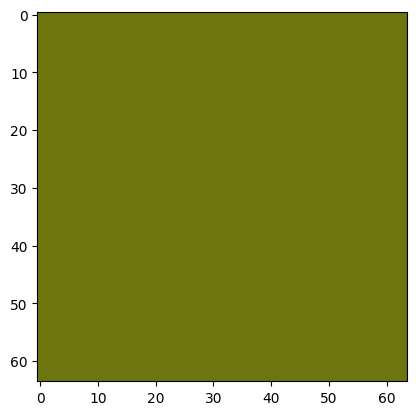

In [70]:
image = make_solid_color(colors['olive'])

print(colors['cloudy blue'])
print(image.shape)

plt.imshow(image)

You may have noticed that an RGB color value is a vector of length 3: (172, 194, 217)

And we now have a dataset where each of these vectors has an associated name:

'Cloudy Blue': (172, 194, 217)

So we can start playing with this in maths world.

Below we create a function that finds the distance between two colours through th euclidean distance of their vectors

In [12]:
def distance(a, b):
    _a = np.array(a) # array from tuple
    _b = np.array(b)
    return np.linalg.norm(_a - _b) # numpy can perform operations on arrays


distance([10, 1], [5, 2])

5.0990195135927845

In [13]:
colors['red']

(229, 0, 0)

In [15]:
d_red_green = distance(colors['red'], colors['green'])
d_red_pink  = distance(colors['red'], colors['pink'])

print(d_red_green, d_red_pink)
print(d_red_green > d_red_pink)

273.70787347096905 232.76812496559748
True


The below loops through the colors and finds

In [16]:
def closest(space, coord, n=10):
    closest = []
    for key in sorted(
        space.keys(),
        key=lambda x: distance(coord, space[x])
    )[:n]:
        closest.append(key)
    return closest

In [17]:
closest(colors, colors['olive'])

['olive',
 'murky green',
 'brownish green',
 'brown green',
 'browny green',
 'olive green',
 'poop green',
 'ugly brown',
 'shit green',
 'greenish brown']

In [18]:
closest(colors, [150, 60, 150])

['warm purple',
 'medium purple',
 'ugly purple',
 'light eggplant',
 'purpleish',
 'purplish',
 'purply',
 'light plum',
 'purple',
 'muted purple']

lets subtract two colors and see of we can find a color closet to those vectors

In [19]:
def subtract(a, b):
    _a = np.array(a)
    _b = np.array(b)
    return _a - _b

In [20]:
closest(colors, subtract(colors['purple'], colors['red']))

['cobalt blue',
 'royal blue',
 'darkish blue',
 'true blue',
 'royal',
 'prussian blue',
 'dark royal blue',
 'deep blue',
 'marine blue',
 'deep sea blue']

Lets create a poem by randomly choosing colours close to red and blue

In [21]:
red = colors['red']
blue = colors['blue']
for i in range(14):
    rednames = closest(colors, red)
    bluenames = closest(colors, blue)
    print("Roses are " + rednames[0] + ", violets are " + bluenames[0])
    red = colors[random.choice(rednames[1:])]
    blue = colors[random.choice(bluenames[1:])]

Roses are red, violets are blue
Roses are cherry red, violets are bright blue
Roses are neon red, violets are blue
Roses are lightish red, violets are cerulean blue
Roses are light red, violets are azure
Roses are reddish pink, violets are bright blue
Roses are pinkish red, violets are clear blue
Roses are strawberry, violets are bright blue
Roses are neon red, violets are cerulean blue
Roses are red pink, violets are cerulean
Roses are pinky red, violets are cerulean blue
Roses are pinkish red, violets are bright blue
Roses are pinky red, violets are azure
Roses are lightish red, violets are bright sky blue


The below function helps us calculates the average of vectors

In [22]:
def mean(coords):
    return np.mean(np.array(coords), axis=0)

In [27]:
# Uncommment and run the line below once to download the model
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 660.6 kB/s eta 0:14:50
     ---------------------------------------- 0.1/587.7 MB 1.1 MB/s eta 0:09:20
     ---------------------------------------- 1.0/587.7 MB 8.3 MB/s eta 0:01:11
     --------------------------------------- 2.0/587.7 MB 12.8 MB/s eta 0:00:46
     --------------------------------------- 3.7/587.7 MB 16.8 MB/s eta 0:00:35
     --------------------------------------- 5.1/587.7 MB 19.2 MB/s eta 0:00:31
     --------------------------------------- 6.4/587.7 MB 20.6 MB/s eta 0:00:29
      -------------------------------------- 7.8/587.7 MB 21.8 MB/s eta 0:00:27
      -------------------------------------- 9.0/587.7 MB 22.1 MB/s eta 0:00:27
      ------------------------------------- 10.2/587.7 MB 22.4 MB/s eta 0:00:26
      ------------------------------------- 11.2/587.7 MB 27.3 MB/s eta 0:00:22
      ------------------------------------- 12.

Here we load _Dracula_ to find any mentions of colours in the book. We can then find the average color and all the closest colors to that average.

In [28]:
# English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
# more info: 

nlp = spacy.load('en_core_web_lg')

In [29]:
with open(DRACULA, encoding="utf8") as file:
    dracula_text = file.read()

dracula_doc = nlp(dracula_text)

In [30]:
# use word.lower_ to normalize case
drac_colors = [colors[word.lower_] for word in dracula_doc if word.lower_ in colors]
avg_color = mean(drac_colors)
print(avg_color)

[147.44839068 113.65371809 100.13540511]


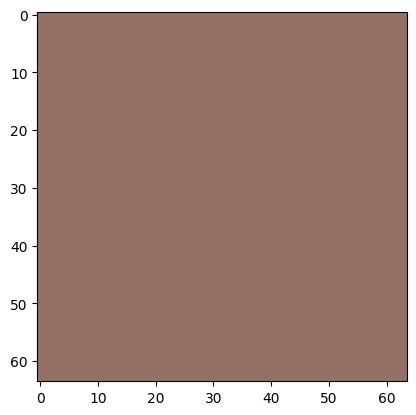

In [31]:
drac_color_img = make_solid_color(np.array(avg_color).astype(np.uint8))
plt.imshow(drac_color_img)

In [32]:
closest(colors, avg_color)

['reddish grey',
 'brownish grey',
 'brownish',
 'brown grey',
 'mocha',
 'grey brown',
 'puce',
 'dull brown',
 'pinkish brown',
 'dark taupe']

In [33]:
closest_dracula_col = closest(colors, avg_color)[0]
print(closest_dracula_col)

reddish grey


(153, 117, 112)


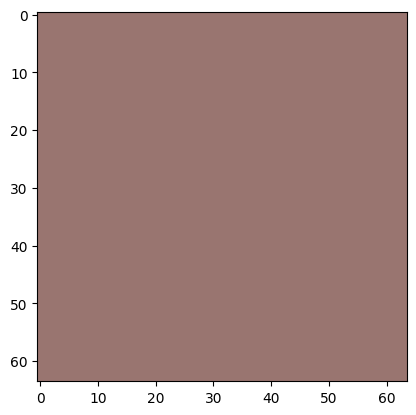

In [34]:
image = make_solid_color(colors[closest_dracula_col])
print(colors[closest_dracula_col])

plt.imshow(image)

Here we load yellow wallpaper to find any mentions of colours in the book. We can then find the average color and all the closest colors to that average.

In [35]:
wallpaper_doc = nlp(open(YELLOW_WALLPAPER).read())

In [36]:
wallpaper_colors = [colors[word.lower_] for word in wallpaper_doc if word.lower_ in colors]
avg_color = mean(wallpaper_colors)
wallpaper_closest = closest(colors, avg_color)

sickly yellow


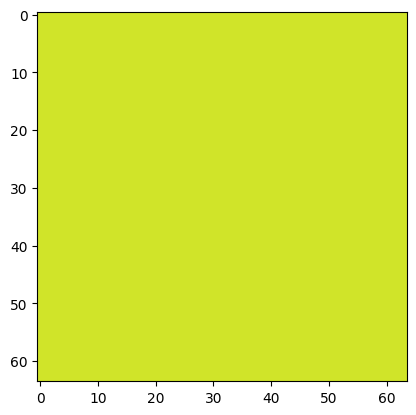

In [37]:
image = make_solid_color(colors[wallpaper_closest[0]])
print(wallpaper_closest[0])

plt.imshow(image)

Lets load the Dracula text and do some word similarities

In [38]:
def cosine_similarity(vec1,vec2): 
    return 1-spatial.distance.cosine(vec1,vec2)

Tokenize Dracula:

In [39]:
tokens = list(set([w.text for w in dracula_doc if w.is_alpha and w.has_vector]))

In [40]:
def vec(s):
    return nlp(s).vector

In [41]:
cosine_similarity(vec('dog'), vec('puppy')) > cosine_similarity(vec('trousers'), vec('octopus'))

True

Learn more about the Python `sorted` function [here](https://www.w3schools.com/python/ref_func_sorted.asp).

In [55]:
def spacy_closest(token_list, vec_to_check, n=10):
    return sorted(
        token_list,
        key=lambda x: cosine_similarity(vec_to_check, vec(x)), # sort based on the similarity of each token to the specified vector
    )[-n:]

In [43]:
day_vec = vec("day")

In [44]:
# the length of the vector is the number of parameters in the model
len(day_vec)

300

In [45]:
min(day_vec), max(day_vec)

(-12.112, 14.145)

In [56]:
# halfway between day and night
spacy_closest(tokens, mean([vec("day"), vec("night")]))

['midnight',
 'nightfall',
 'nightly',
 'nights',
 'week',
 'afternoon',
 'evening',
 'morning',
 'night',
 'day']

In [57]:
spacy_closest(tokens, subtract(vec("wine"), vec("alcohol")))

['sparkling',
 'carafe',
 'lovelier',
 'splendid',
 'plum',
 'exquisite',
 'brandy',
 'beer',
 'sherry',
 'wine']

## Sentence Similarity
Lets do some basic sentence similarities, we are going to average the vectors from all the words in the sentence. we will assume if those two sentences are similar the mean of the each word vector in the sentence will be close

In [48]:
def sentvec(s):
    sentence = nlp(s)
    return mean([w.vector for w in sentence])

In [49]:
sentences = list(dracula_doc.sents)

In [50]:
wallpaper_sentences = list(wallpaper_doc.sents)

In [51]:
wallpaper_sentences[100]

I used to feel that if any of the other things looked too fierce I could
always hop into that chair and be safe.


In [52]:
sentences[111]

I
did not know what to do, for, as an English Churchman, I have been
taught to regard such things as in some measure idolatrous, and yet it
seemed so ungracious to refuse an old lady meaning so well and in such a
state of mind.

In [64]:
def spacy_closest_sent(space, input_str, n=10):
    input_vec = sentvec(input_str)
    # we are selecting the top 10 sentences
    return sorted(space,
                  key=lambda x: cosine_similarity(np.mean([w.vector for w in x], axis=0), input_vec))[-n:]

In [65]:
for sent in spacy_closest_sent(wallpaper_sentences, "My favorite food is strawberry ice cream."):
    print(sent.text)
    print("---")

It is so puzzling.
---
It is like a bad
dream.


---
It gets into my hair.


---
There is a DELICIOUS garden!
---
This bedstead is fairly gnawed!


---
It is fortunate Mary is so good with the baby.
---
﻿Project
---
1.B.  
---
1.C.  
---
1.E.  
---
